In [18]:
# #pip install
# %pip install scikit-learn
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib
# %pip install imblearn

In [19]:
#imports
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn import under_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import  GaussianNB, BernoulliNB

# Funções de Auxílio 

In [20]:
#treinamentos
def knnFit(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia KNN:", acuracia,'%')
    return model
def gaussian(X_train, y_train, X_test, y_test):
    gnb = GaussianNB()
    model = gnb.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia gaussian:", acuracia,'%')
    return model
def bernoullin(X_train, y_train, X_test, y_test):
    bnb = BernoulliNB()
    model = bnb.fit(X_train, y_train)
    pred = model.predict(X_test)
    acuracia = (pred == y_test).sum() / len(y_test) * 100
    print("Acurácia Bernoulli:", acuracia,'%')
    return model

In [21]:
#utils
def shuffle(X, y):
    return train_test_split(
    X, y, test_size=0.33, random_state=42)

# Classificação se o player morreu no round ou ficou vivo no mapa da Mirage
### com base nas colunas X iremos descobrir se o player ficou vivo ou nao no round. Sendo isDead 1 quando ele morreu e 0 quando ele ficou vivo



In [22]:
def loadDataset()-> DataFrame:
    return pd.read_csv('dataset/CSGO_MIRAGE_MAP.csv')

dt = loadDataset()
display(dt.describe())
display(dt.columns)
display(dt['isDead'].describe())
print('contagem de valores nulos',dt.isnull().sum())
print(Counter(dt['isDead']),'\n podemos notar que não está desbalanceado o valor entre as classes, sendo que temos 4926 dados em que o player morreu e 14954 em que o player ficou vivo')


,roundNum,tick,hp,armor,equipmentValue,cash,kills_from_avg,deaths_from_avg,total_hp_enemy,total_hp_team,...,team_in_range_200,team_in_range_500,team_in_range_1000,equipment_value_team,equipment_value_enemy,distance_closest_enemy,hp_closest_enemy,isAlive,isDead,player_num
count,19880.000000,19880.000000,19880.000000,19880.000000,19880.000000,19880.000000,1.988000e+04,1.988000e+04,19880.000000,19880.000000,...,19880.000000,19880.000000,19880.000000,19880.000000,19880.000000,1.988000e+04,19880.000000,19880.000000,19880.000000,19880.000000
mean,13.793260,5316.727867,70.687928,64.260463,3433.176559,1880.508048,2.859327e-18,8.149082e-17,353.439638,353.439638,...,0.956439,1.310161,1.881187,16626.421026,16626.421026,7.328443e+04,71.547082,0.752213,0.247787,5.500000
std,7.725158,3585.686231,43.362230,45.993394,2557.599264,1862.692085,9.487072e-01,9.279600e-01,156.984408,156.984408,...,0.754825,1.174531,1.534901,9515.594744,9515.594744,3.459638e+05,42.814584,0.431738,0.431738,2.872354
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.470488e+00,-2.846050e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,6.000000,2304.000000,4.000000,0.000000,200.000000,300.000000,-5.981337e-01,-6.616932e-01,220.000000,220.000000,...,1.000000,1.000000,1.000000,7850.000000,7850.000000,4.165937e+02,15.000000,1.000000,0.000000,3.000000
50%,14.000000,4864.000000,100.000000,97.000000,4350.000000,1500.000000,-6.993786e-02,0.000000e+00,400.000000,400.000000,...,1.000000,1.000000,2.000000,16900.000000,16900.000000,1.112548e+03,100.000000,1.000000,0.000000,5.500000
75%,20.000000,7936.000000,100.000000,100.000000,5300.000000,2900.000000,5.720776e-01,6.037076e-01,500.000000,500.000000,...,1.000000,2.000000,3.000000,25650.000000,25650.000000,1.938093e+03,100.000000,1.000000,0.000000,8.000000
max,27.000000,15232.000000,100.000000,100.000000,7950.000000,11050.000000,2.229504e+00,2.846050e+00,500.000000,500.000000,...,5.000000,5.000000,5.000000,32600.000000,32600.000000,1.734017e+06,100.000000,1.000000,1.000000,10.000000


Index(['roundNum', 'tick', 'hp', 'armor', 'activeWeapon', 'isBlinded',
       'isAirborne', 'isDucking', 'isStanding', 'isScoped', 'isWalking',
       'equipmentValue', 'cash', 'hasHelmet', 'kills_from_avg',
       'deaths_from_avg', 'total_hp_enemy', 'total_hp_team', 'num_enemy_alive',
       'num_team_alive', 'enemy_in_range_200', 'enemy_in_range_500',
       'enemy_in_range_1000', 'enemy_in_range_2000', 'enemy_hp_in_range_500',
       'enemy_hp_in_range_1000', 'enemy_hp_in_range_2000',
       'enemy_equipment_in_range_500', 'enemy_equipment_in_range_1000',
       'enemy_equipment_in_range_2000', 'team_in_range_200',
       'team_in_range_500', 'team_in_range_1000', 'equipment_value_team',
       'equipment_value_enemy', 'distance_closest_enemy', 'hp_closest_enemy',
       'weapon_closest_enemy', 'isAlive', 'isDead', 'player_num'],
      dtype='object')

count    19880.000000
mean         0.247787
std          0.431738
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: isDead, dtype: float64

contagem de valores nulos roundNum                         0
tick                             0
hp                               0
armor                            0
activeWeapon                     0
isBlinded                        0
isAirborne                       0
isDucking                        0
isStanding                       0
isScoped                         0
isWalking                        0
equipmentValue                   0
cash                             0
hasHelmet                        0
kills_from_avg                   0
deaths_from_avg                  0
total_hp_enemy                   0
total_hp_team                    0
num_enemy_alive                  0
num_team_alive                   0
enemy_in_range_200               0
enemy_in_range_500               0
enemy_in_range_1000              0
enemy_in_range_2000              0
enemy_hp_in_range_500            0
enemy_hp_in_range_1000           0
enemy_hp_in_range_2000           0
enemy_equipment_in_range_500 

# Rodando os treinamentos sem o Pré-processamento 
- # KNN

In [23]:
#irei tirar apenas para rodar as colunas que sao TEXTO, coluna ALVO ou colunas que sao fortemente acopladas com a classe desejada (HP, isAlive)
dtX = dt.drop(columns=['isAlive', 'hp', 'activeWeapon', 'weapon_closest_enemy', 'isDead'])
dtY = dt.isDead
X_train, X_test, y_train, y_test = shuffle(dtX, dtY)
model = knnFit(X_train, y_train, X_test, y_test)
# Normalizar o X_train e X_test



#por mais que o resultado esteja 99.72...% sabemos que esse resultado não e real. Uma vez que a classes Y não tem um bom balanceamento, tendo muito mais dados que o jogador ficou vivo do que dados que o jogador morreu. Por isso nossa IA viciou em preditar que o jogar ficou vivo, que devido sua alta quantidade de amostra interferiu na acuracia


prod = pd.read_csv('dataset/9z-vs-sharks-m4-mirage_PRODUCTION.csv')
prodX = prod.get(dtX.columns)
prodY = prod.isDead
rus = under_sampling.RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(prodX, prodY)
pred = model.predict(X_resampled)
acuracia = (pred == y_resampled).sum() / len(y_resampled) * 100
print("Acurácia em um dataset balanceado de prod:", acuracia, '%')
#para exemplificar o que disse anteriormente rodei o modelo em uma base de prod balanceada e obtive a acuracia de 97.11. Ou seja quanto mais dados em que o player morreu menor a acuracia desse modelo

Acurácia KNN: 99.72565157750343 %
Acurácia em um dataset balanceado de prod: 97.11797450170587 %


# Análises & Pré-Processamento

Counter({0.0: 4926, 1.0: 4926}) 
 Notamos que agora igualamos a quantidade de amostras de cada classe


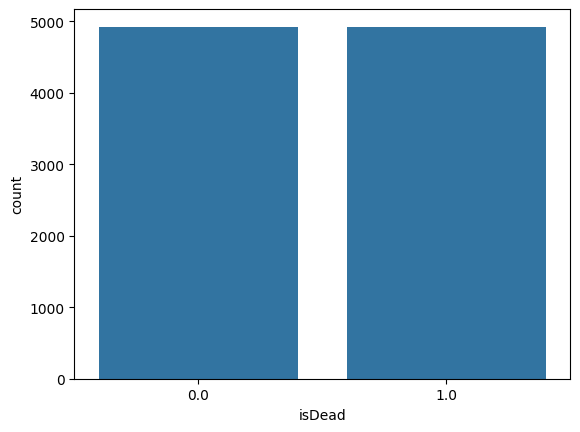

In [24]:
#primeiro de tudo, irei começar balanceando minha classe para todas as classes Y terem a mesma quantidade de amostra
# a forma que irei tentar primeiro é a Subamostragem, que consiste em cortar dados da classe majoritaria. A desvantagem é que posso vir perder dados importantes ja que vou remover  14954-4926=10028 dados.
dt = loadDataset()
dtY = dt.copy().isDead
dtX = dt.copy().drop(columns=['isAlive', 'isDead'])
rus = under_sampling.RandomUnderSampler(random_state=42)
#

#
X_resampled, y_resampled = rus.fit_resample(dtX, dtY)
print(Counter(y_resampled), '\n Notamos que agora igualamos a quantidade de amostras de cada classe')
y_resampled_df = pd.DataFrame(y_resampled, columns=["isDead"])
sns.countplot(x="isDead", data=y_resampled_df)


# Convertendo y_resampled para uma série
y_resampled_series = pd.Series(y_resampled)

x_resampled_series = pd.DataFrame(X_resampled, columns=dtX.columns)


In [25]:
#proximo passo que farei é a analise de colunas relevantes para meu algoritmo
"""
    ***Analise Incial

    1 - logo de inicio, como conheço do jogo, sei que a coluna tick nao sera necessaria pois esta com valores atipicos. Os valores dos servidores do csgo sao 64 ou 128 Tick, sendo essas amostras retiradas em um servidor 128 tick como dito no kaggle

    2 - playernum apenas serve para relacionar com o player, nao sera usado nesse projeto

    3 - HP, esta muito ligado com o meu Y que quero prever sendo que sempre que for 0 eu posso afirmar que ele morreu no round

    4 - a coluna activeWeapon irei transformar em :3 quando tiver com faca, 2 pistola, 1 SMG, 0 outras armas (rifles e sniper)  e quando tiver com ultilitarias vou atribuir 1.
        Irei fazer isso pois a chance do player morrer quando estiver com a faca sera maior do que quando qualquer outra arma. Ou seja quanto maior o numero mais chance de morrer
    
    5 - a coluna weapon_closest_enemy irei transformar em : 0 quando tiver com faca, 1 pistola,2 SMG, 3 outras armas (rifles e sniper) e quando tiver com ultilitarias vou atribuir 1.
        Irei fazer isso pois a chance do inimigo matar quando estiver com a faca sera menor do que quando qualquer outra arma. Ou seja quanto maior o numero maior chance do inimigo matar o player

        **Para as utilitarias deixei o valor de 1 tanto para quando o inimigo esta com ela ativa quanto para quando o player esta com ela ativa, pois a chance de matar e nao morrer com a granada é igual para os dois casos

"""

#passos 1,2,3 
x_analytic_step = x_resampled_series.drop(columns=['hp', 'player_num', 'tick']) 
#passos 4
x_analytic_step['activeWeapon'] = x_analytic_step['activeWeapon'].map({
    "Melee Kills": 3,
    "Pistol Kills": 2,
    "Utility Kills":1,
    "SMG Kills":1
}).fillna(0).astype(int)
x_analytic_step['weapon_closest_enemy'] = x_analytic_step['weapon_closest_enemy'].map({
    "Melee Kills": 0,
    "Pistol Kills": 1,
    "Utility Kills":1,
    "SMG Kills":2
}).fillna(3).astype(int)

# X_train, X_test, y_train, y_test = shuffle(x_frst_step, y_resampled_series)
# knnFit(X_train, y_train, X_test, y_test)


In [26]:
#normalizacao



scaler = StandardScaler()
x_normalize = pd.DataFrame(scaler.fit_transform(x_analytic_step), columns=x_analytic_step.columns)


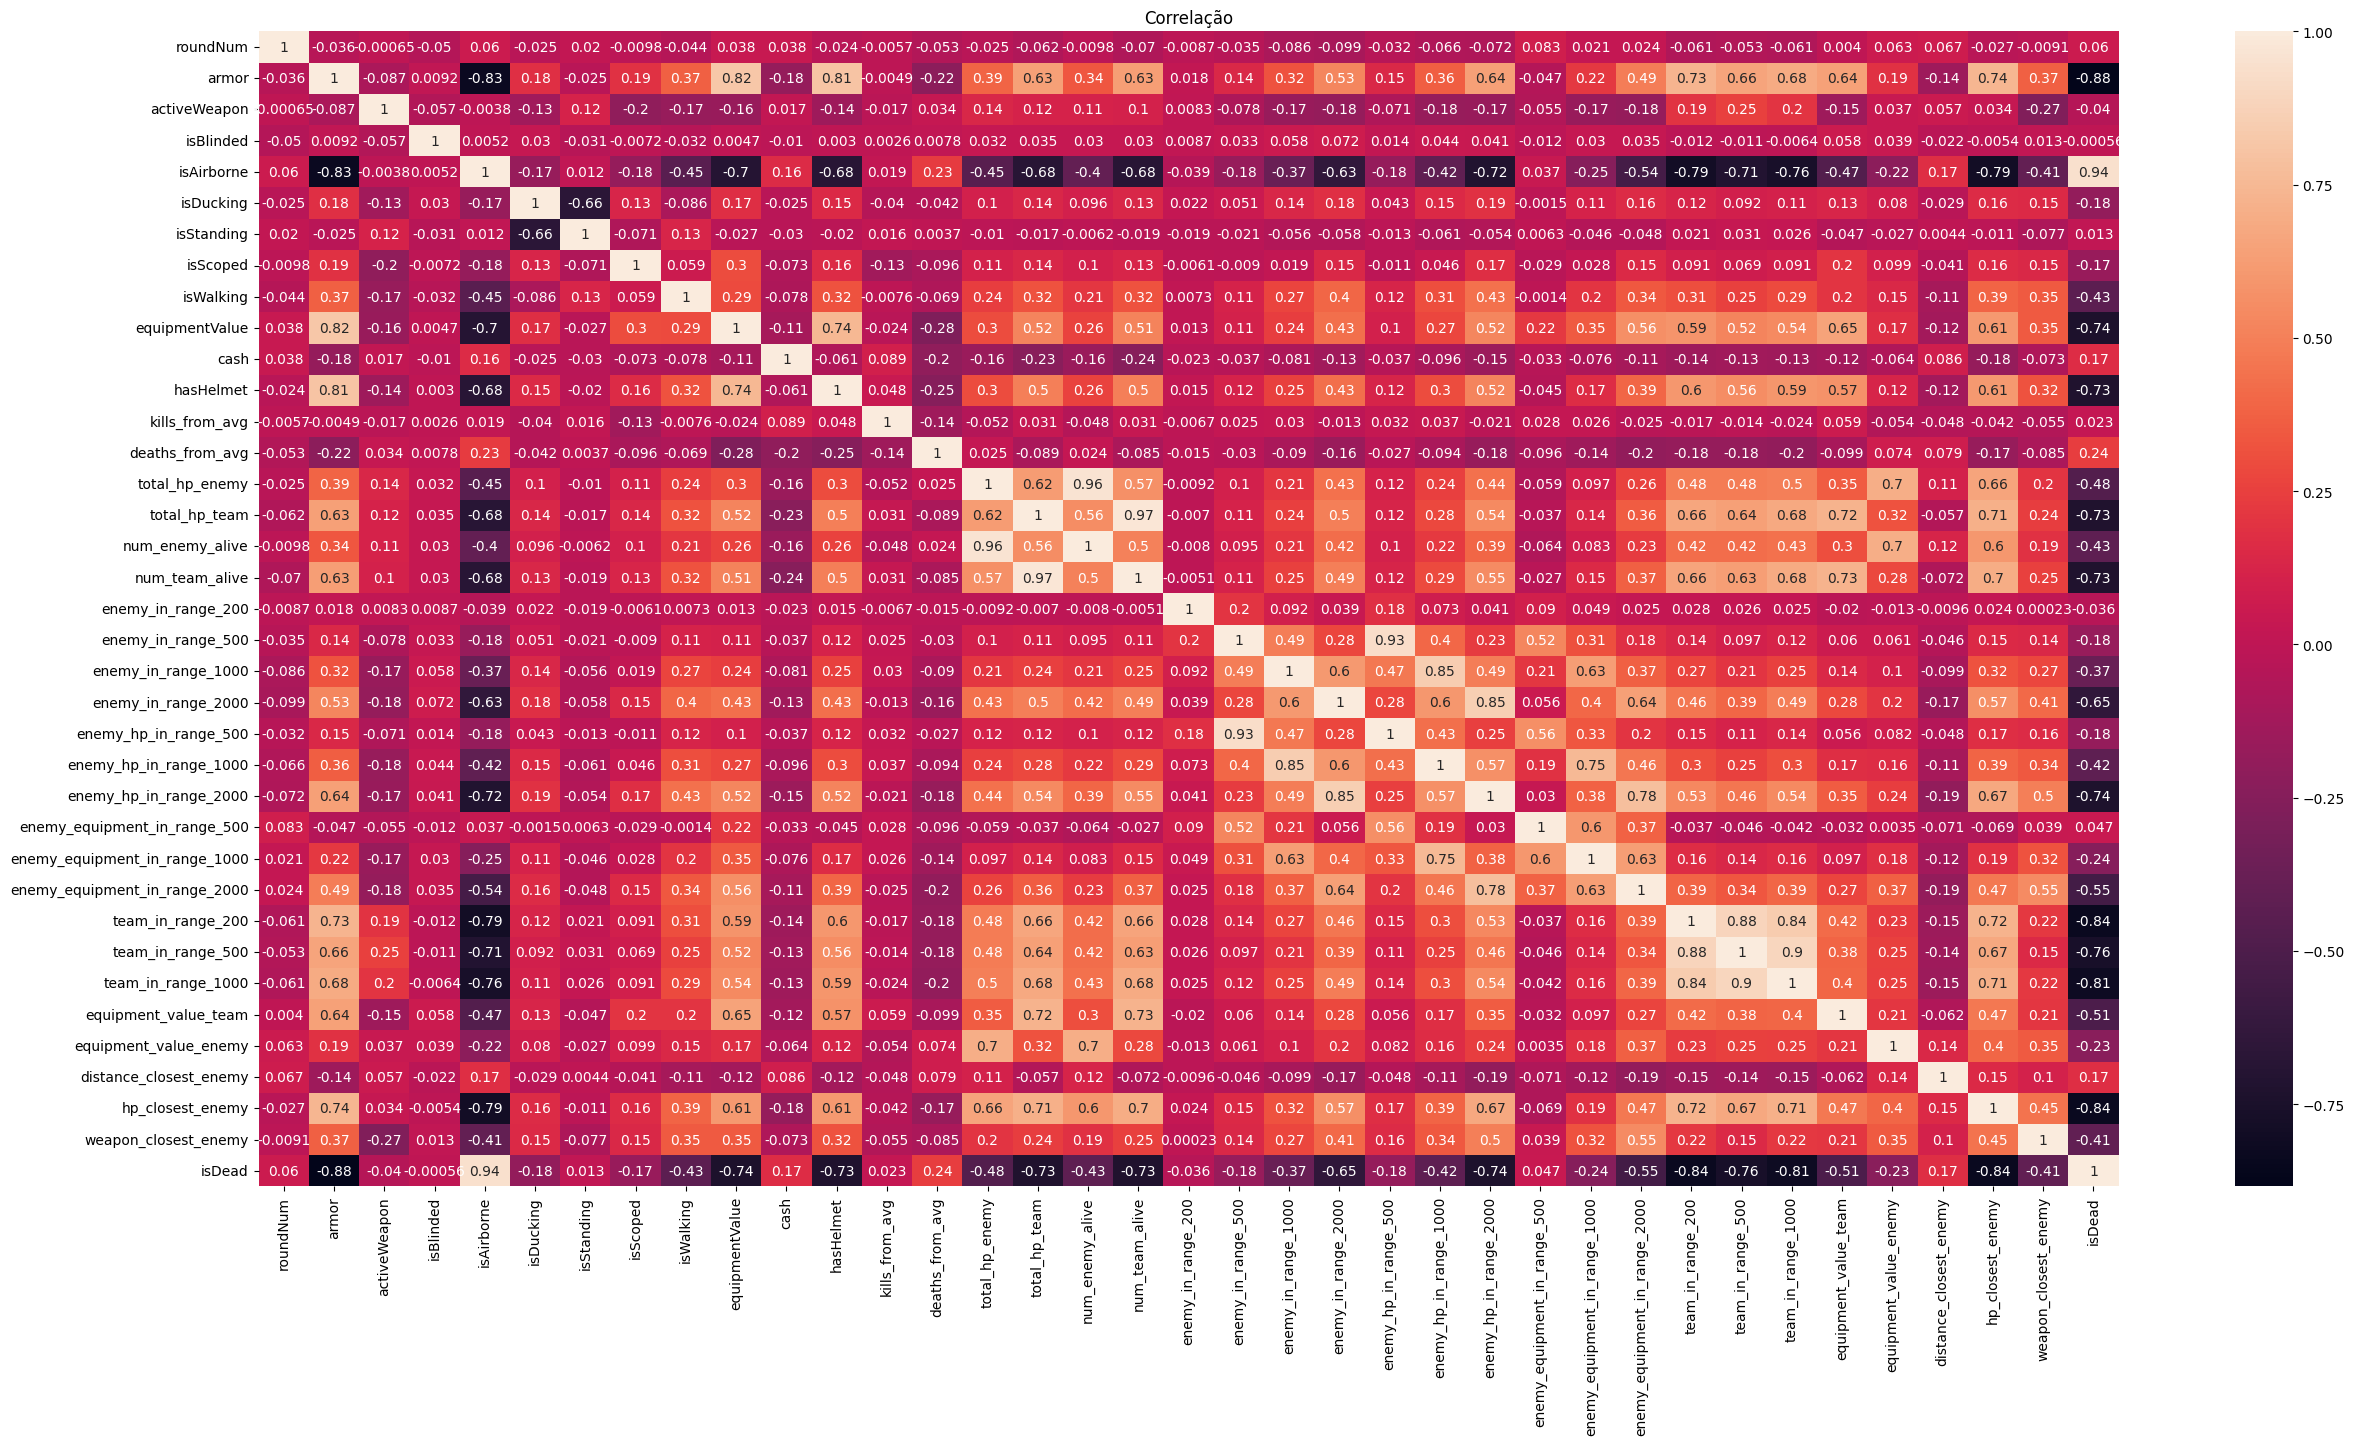

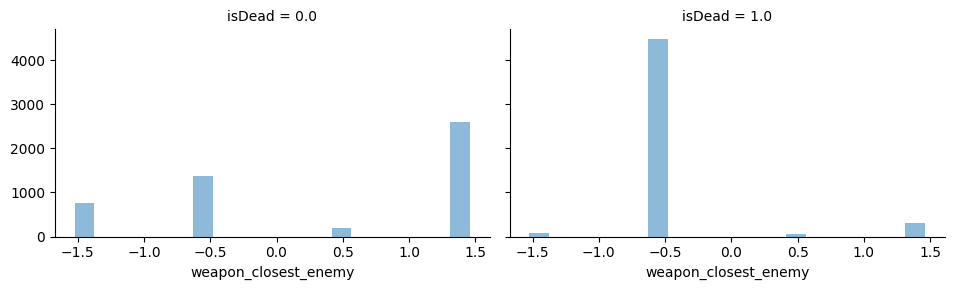

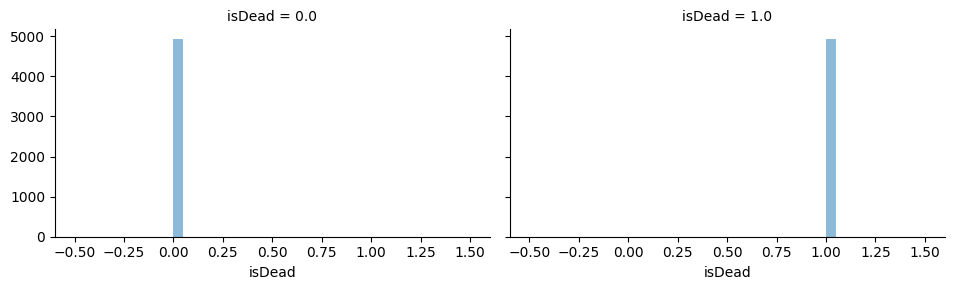

In [27]:



#grafico de calor

x_normalize = x_normalize.reset_index(drop=True)
# x_analytic_step = x_analytic_step.reset_index(drop=True)

y_resampled_series = y_resampled_series.reset_index(drop=True)

dtNormalize = pd.concat([x_normalize, y_resampled_series], axis=1)
# dtNormalize = pd.concat([x_analytic_step, y_resampled_series], axis=1)

corr = dtNormalize.corr()
plt.figure(figsize=(30, 15))  # Ajuste os valores conforme necessário
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns,)
plt.title('Correlação')
plt.show()


grid = sns.FacetGrid(dtNormalize, col='isDead', aspect=1.6)
grid.map(plt.hist, 'weapon_closest_enemy', alpha=.5, bins=20)
grid.add_legend()


grid = sns.FacetGrid(dtNormalize, col='isDead', aspect=1.6)
grid.map(plt.hist, 'isDead', alpha=.5, bins=20)
grid.add_legend()

In [28]:
#analise grafico de calor
"""
    com base na correlacao com o Y, retirei as classes onde a correlacao nao bate | 40% | de variação
"""
dtFinal = dtNormalize.drop(columns=[
'roundNum',
'activeWeapon',
'isBlinded',
'isDucking',
'isWalking',
'isStanding',
'isScoped',
'cash',
'kills_from_avg',
'deaths_from_avg',
'total_hp_enemy',
'num_enemy_alive',
'enemy_in_range_200',
'enemy_in_range_500',
'enemy_in_range_1000',
'enemy_hp_in_range_500',
'enemy_equipment_in_range_500',
'enemy_equipment_in_range_1000',
'enemy_equipment_in_range_2000',
'equipment_value_team',
'weapon_closest_enemy',
'equipment_value_enemy',
'distance_closest_enemy',
'enemy_hp_in_range_1000'
])
display(dtFinal.head(5))
"""
    com base nessa analise geral posso gerar mais um mapa de calor mais visivel onde o foco agora é achar colunas que estam
    representando a mesma informacoes
"""

X_train, X_test, y_train, y_test = shuffle(dtFinal.drop(columns=['isDead']), dtFinal.isDead)
##
model = knnFit(X_train, y_train, X_test, y_test)
model2 = gaussian(X_train, y_train, X_test, y_test)
model3 = bernoullin(X_train, y_train, X_test, y_test)
###

print(X_train.columns)
# plt.figure(figsize=(15, 15))  # Ajuste os valores conforme necessário

# sns.heatmap(dtFinal.corr(), annot=True,
#         xticklabels=dtFinal.columns,
#         yticklabels=dtFinal.columns,)

# plt.show()
#####
prodOrigin = pd.read_csv('dataset/9z-vs-sharks-m4-mirage_PRODUCTION.csv')


prodOrigin['activeWeapon'] = prodOrigin['activeWeapon'].map({
    "Melee Kills": 3,
    "Pistol Kills": 2,
    "Utility Kills":1,
    "SMG Kills":1
}).fillna(0).astype(int)
prodOrigin['weapon_closest_enemy'] = prodOrigin['weapon_closest_enemy'].map({
    "Melee Kills": 0,
    "Pistol Kills": 1,
    "Utility Kills":1,
    "SMG Kills":2
}).fillna(3).astype(int)

prodX = prodOrigin.get(dtFinal.drop(columns=['isDead']).columns)
prodY = prodOrigin.isDead

rus = under_sampling.RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(prodX, prodY)


pred = model3.predict(X_resampled)
acuracia = (pred == y_resampled).sum() / len(y_resampled) * 100
print("Acurácia teste em producao Bernolin:", acuracia, '%')

pred = model.predict(X_resampled)
acuracia = (pred == y_resampled).sum() / len(y_resampled) * 100
print("Acurácia teste em producao Knn:", acuracia, '%')

pred = model2.predict(X_resampled)
acuracia = (pred == y_resampled).sum() / len(y_resampled) * 100
print("Acurácia teste em producao Gaussian:", acuracia, '%')

,armor,isAirborne,equipmentValue,hasHelmet,total_hp_team,num_team_alive,enemy_in_range_2000,enemy_hp_in_range_2000,team_in_range_200,team_in_range_500,team_in_range_1000,hp_closest_enemy,isDead
0,1.189967,-1.061359,0.407188,1.372616,1.235585,1.113890,0.707724,1.426362,1.794275,1.872296,2.450613,1.019931,0.0
1,1.189967,-1.061359,0.968843,1.372616,0.047185,-0.092977,0.707724,1.153259,1.794275,0.993419,1.144503,1.019931,0.0
2,1.189967,-1.061359,0.968843,1.372616,1.235585,1.113890,0.707724,1.448210,1.794275,0.993419,1.144503,1.019931,0.0
3,-0.884143,-1.061359,-0.641234,-0.728536,1.235585,1.113890,-0.646948,-0.736614,0.478028,0.993419,1.144503,1.019931,0.0
4,1.189967,-1.061359,0.968843,1.372616,1.235585,1.113890,0.707724,1.448210,0.478028,0.993419,0.491448,1.019931,0.0


Acurácia KNN: 100.0 %
Acurácia gaussian: 100.0 %
Acurácia Bernoulli: 100.0 %
Index(['armor', 'isAirborne', 'equipmentValue', 'hasHelmet', 'total_hp_team',
       'num_team_alive', 'enemy_in_range_2000', 'enemy_hp_in_range_2000',
       'team_in_range_200', 'team_in_range_500', 'team_in_range_1000',
       'hp_closest_enemy'],
      dtype='object')
Acurácia teste em producao Bernolin: 100.0 %
Acurácia teste em producao Knn: 55.386963548213316 %
Acurácia teste em producao Gaussian: 50.0 %


<Axes: >

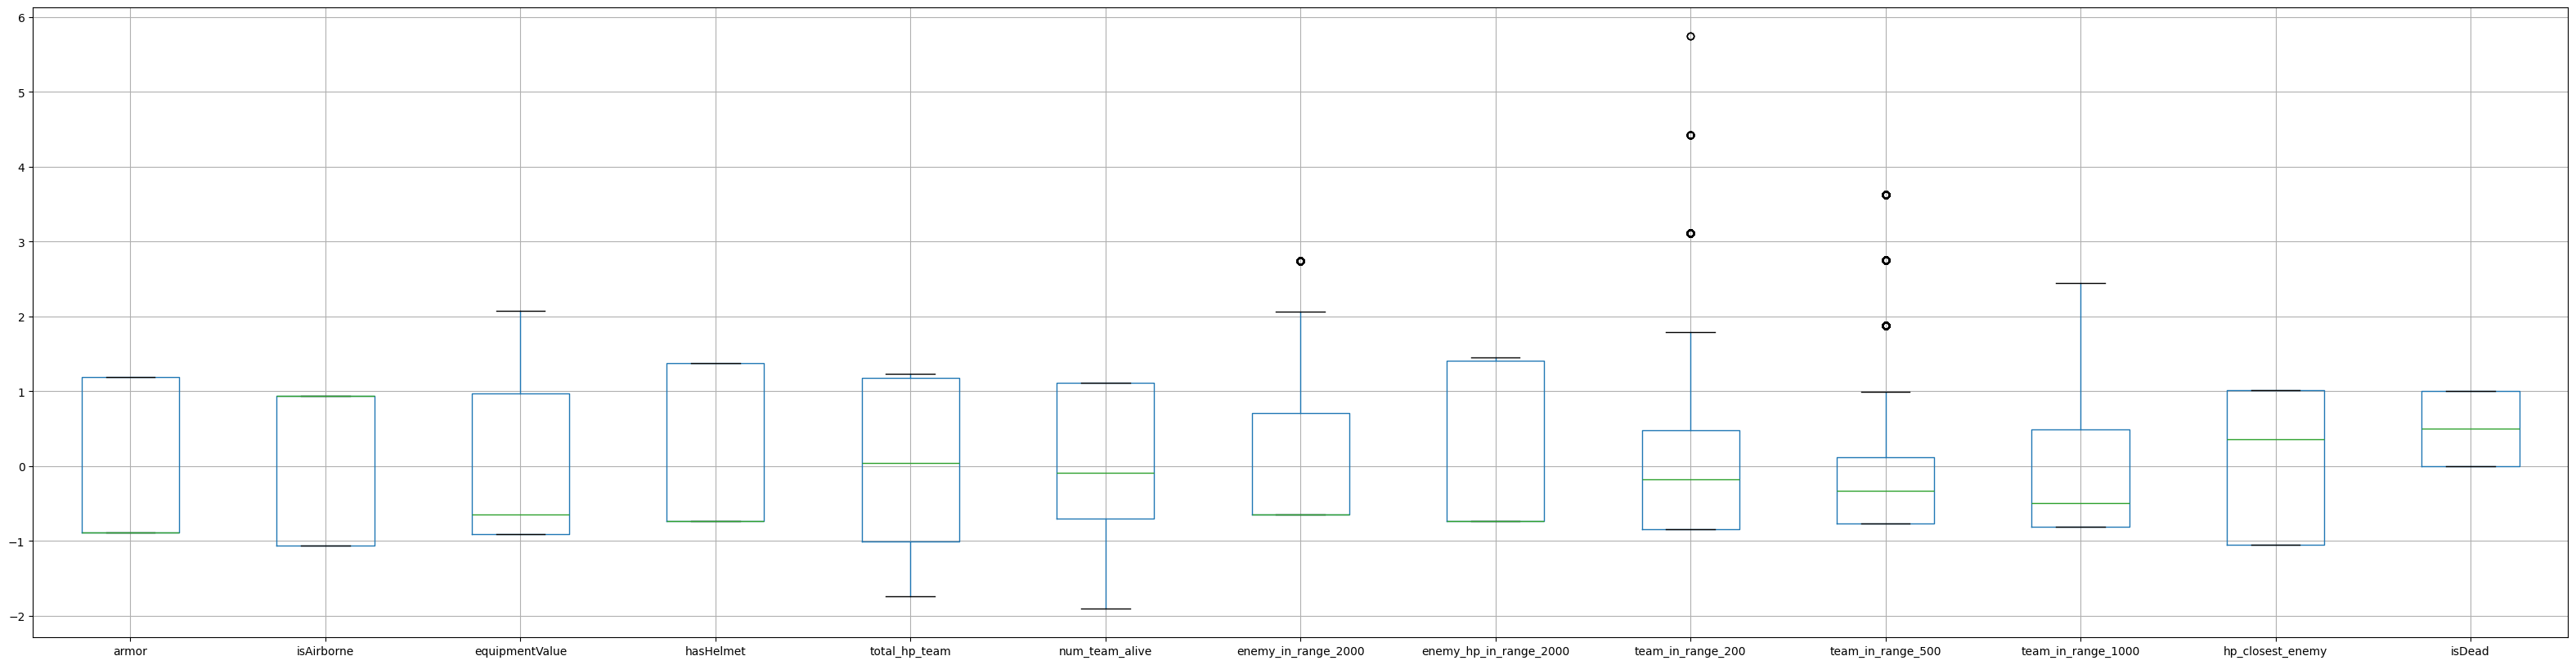

In [29]:
#outliners
dtFinal.boxplot(figsize=(40,10))


In [30]:
# #
# grid = sns.FacetGrid(dtFinal, col='isDead', aspect=1.6)
# grid.map(plt.hist, 'equipmentValue', alpha=.5, bins=20)
# grid.add_legend()

# #temos analise so de quando o usuario usou pistola e morreu
# grid = sns.FacetGrid(dtFinal, col='isDead', aspect=1.6)
# grid.map(plt.hist, 'activeWeapon', alpha=.5, bins=20)
# grid.add_legend()

# grid = sns.FacetGrid(dtFinal, col='isDead', aspect=1.6)
# grid.map(plt.hist, 'total_hp_enemy', alpha=.5, bins=20)
# grid.add_legend()

# grid = sns.FacetGrid(dtFinal, col='isDead', aspect=1.6)
# grid.map(plt.hist, 'total_hp_team', alpha=.5, bins=20)
# grid.add_legend()


# grid = sns.FacetGrid(dtFinal, col='isDead', aspect=1.6)
# grid.map(plt.hist, 'num_enemy_alive', alpha=.5, bins=20)
# grid.add_legend()


In [31]:
sns.pairplot(dtFinal, hue='isDead', height=3.5)

plt.show()
##isso vai demorar em torno 5 min para gerar kkk